In [1]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

In [2]:
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#importing model 
from sklearn.ensemble import RandomForestRegressor

In [4]:
df2 = pd.read_csv("C:/Users/rknet/OneDrive/Desktop/feature_engineering.csv",parse_dates=['Date'])
comparison_df = pd.read_csv("C:/Users/rknet/OneDrive/Desktop/results.csv")

In [5]:
#setting date and store as index
df2.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df2.sort_index(inplace=True)

In [6]:
comparison_df.drop('Unnamed: 0',axis=1,inplace=True)
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003857,0.003319,0.057611,0.996681,0.996681,0.361098,0.261586,0.511455,0.724230,0.724056
1,Random Forest Regressor,0.092721,0.019563,0.139869,0.980437,0.980436,0.274091,0.142424,0.377391,0.849853,0.849759


In [7]:
df2.head(1)

,,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,...,PromoInterval_Mar_Jun_Sept_Dec,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,date_year,date_weekofyear,date_month,date_dayofweek,date_day
Date,Store,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,1,...,0,0,1,0,0,2013,1,1,1,1


In [8]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]

In [9]:
#X and y split for train and test
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (964804, 38)
The shape of y_train is: (964804, 1)
The shape of X_test is: (52405, 38)
The shape of y_test is: (52405, 1)


In [10]:
# Create model
rf_tuned = RandomForestRegressor()

In [11]:
#import
from sklearn.model_selection import RandomizedSearchCV
#grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [100, 130, 150]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)

#fitting
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 5.9min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 6.1min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 6.0min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.0min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=15.3min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.3min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [100, 130, 150]},
                   random_state=42, verbose=2)

In [12]:
#best para
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [13]:
#save the best parameters
random_t = rf_random.best_estimator_

In [14]:
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']


In [15]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)

  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

The Mean Absolute Error for the validation set is 343.523535
The Mean Squared Error for the validation set is 300954.336773
The Root Mean Squared Error for the validation set is 548.593052
The R^2 for the validation set is 0.978402
The Adjusted R^2 for the validation set is 0.978386


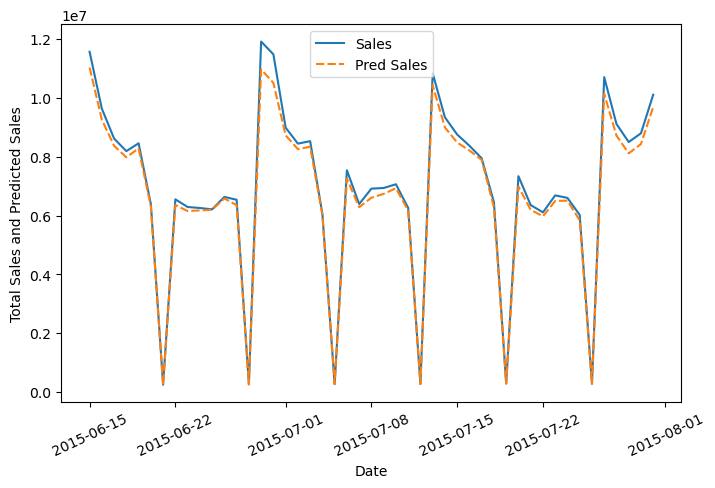

In [16]:
#evaluate tuned model
random_tuned = model_evaluation('Random Forest Tuned',random_t,X_train,y_train,X_test,y_test)

In [17]:
#add to comparison_df
comparison_df = comparison_df.append(random_tuned)

In [18]:
#comparison_df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003857,0.003319,0.057611,0.996681,0.996681,0.361098,0.261586,0.511455,0.724230,0.724056
1,Random Forest Regressor,0.092721,0.019563,0.139869,0.980437,0.980436,0.274091,0.142424,0.377391,0.849853,0.849759
0,Random Forest Tuned,97.877517,26760.047740,163.584986,0.998199,0.998199,343.523535,300954.336773,548.593052,0.978402,0.978386


<AxesSubplot:xlabel='Importance', ylabel='Variable'>

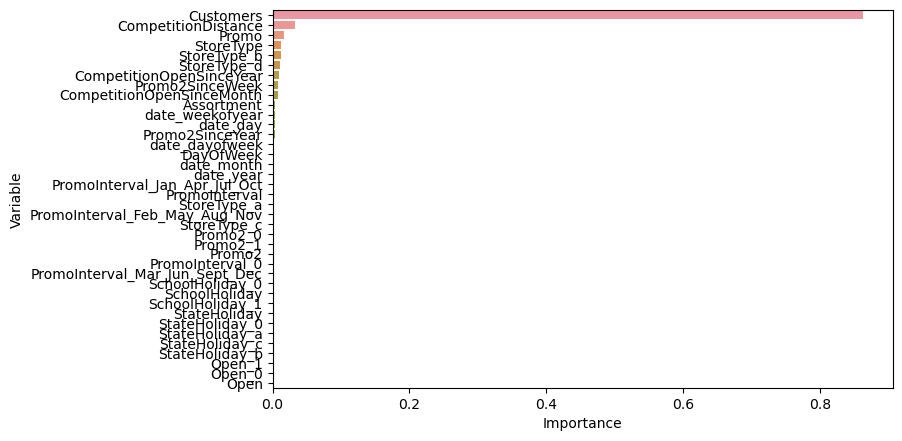

In [19]:
#visualising feature importance of XGB
feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": random_t.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])

# Model Performance and Evaluation

In [20]:
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003857,0.003319,0.057611,0.996681,0.996681,0.361098,0.261586,0.511455,0.724230,0.724056
1,Random Forest Regressor,0.092721,0.019563,0.139869,0.980437,0.980436,0.274091,0.142424,0.377391,0.849853,0.849759
0,Random Forest Tuned,97.877517,26760.047740,163.584986,0.998199,0.998199,343.523535,300954.336773,548.593052,0.978402,0.978386


<AxesSubplot:xlabel='Test_R2', ylabel='Model_Name'>

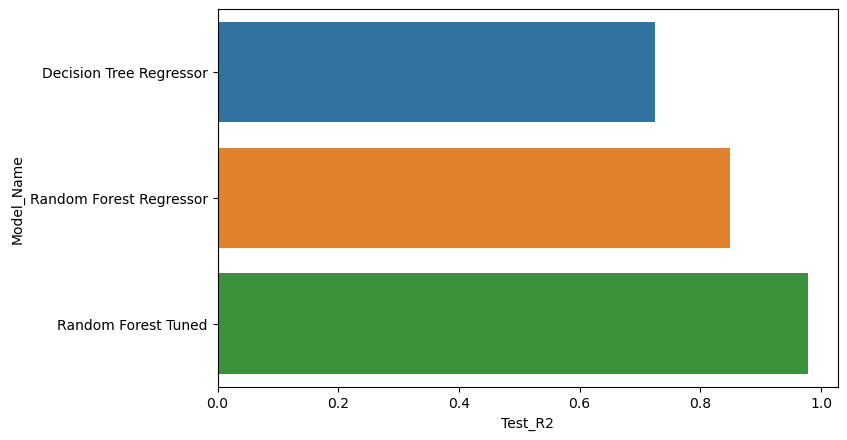

In [21]:
#visualising our comparison df for Test R2
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_R2'])

In [22]:
#test values
baseline_r2 = 0.915750
random_r2 = 0.955673
r_tuned_r2 = 0.955878

In [23]:
#improvement % 
improvement_r = ((random_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

Model Performance
Improvement of 4.36 % was seen in Random Forest against Decision Tree.


## Random Forest Tuned vs Baseline and Random Forest Models

In [24]:
#improvement % of tuned vs baseline

improvement_r = ((r_tuned_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Decision Tree.')

Model Performance
Improvement of 4.382 % was seen in Random Forest Tuned against Decision Tree.


In [25]:
#improvement % of tuned vs simple random forest
improvement_r = ((r_tuned_r2 - random_r2)/random_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Simple Random Forest.')

Model Performance
Improvement of 0.021 % was seen in Random Forest Tuned against Simple Random Forest.


Observation

The maximum R^2 was seen in tuned Random Forest model with the value 0.955878 which was only 0.021% improved from a simple random forest model.
It seems like we have maxed out on performance with the data and these models.

## Store wise Sales Predictions


In [33]:
#predictions 
y_pred_test = random_t.predict(X_test)
six_weeks_sales_df = y_test.copy()
six_weeks_sales_df['Pred_Sales'] = y_pred_test.tolist()

In [34]:
#head
six_weeks_sales_df.head()

Sales  Pred_Sales
Date       Store                   
2015-06-15 1       5518     5414.10
           2       8106     7561.87
           3      10818    10239.24
           4      12398    11398.61
           5       7808     7673.90

In [37]:
#sales vs predictions
six_weeks_sales_df.head()

Sales  Pred_Sales
Date       Store                   
2015-06-15 1       5518     5414.10
           2       8106     7561.87
           3      10818    10239.24
           4      12398    11398.61
           5       7808     7673.90

In [38]:
#locating
six_weeks_sales_df.loc[('2015-06-15',5)]

Sales         7808.0
Pred_Sales    7673.9
Name: (2015-06-15 00:00:00, 5), dtype: float64

In [39]:
#locating
six_weeks_sales_df.loc[('2015-07-28',56)]

Sales         8400.00
Pred_Sales    8078.56
Name: (2015-07-28 00:00:00, 56), dtype: float64

### Conclusion and Recommendations


**Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:

there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
The positive effect of promotion on Customers and Sales is observable.
Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
Random Forest Tuned Model gave the best results and only 0.021% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.

### **Recommendations**

More stores should be encouraged for promotion.
Store type B should be increased in number.
There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.